In [1]:
from __future__ import print_function
import numpy as np
import numpy.linalg as LA
from maxvolpy.maxvol import rect_maxvol, maxvol
import matplotlib.pyplot as plt
import gen_mat as gen
from numba import jit, njit, prange
from mva_test import *
%matplotlib inline

### What we're  expecting to have (as of Page 26, [link](https://www.kent.ac.uk/smsas/personal/kx/pubs/16firstkind.pdf)):
| degree $(n)$  | $\mathcal{L}(n)$,  first kind     |  $\mathcal{L}(n)$,    second kind    | 
| ---     | ---              | ---                 |
|  1      |1.414213562373095 |   1.000000000000000 |
|  2      |1.666666666666667 |   1.250000000000000 |
|  3      |1.847759065022574 |   1.666666666666667 |
|  4      |1.988854381999833 |   1.798761803322554 |
|  5      |2.104397682646484 |   1.988854381999832 |
|  6      |2.202214555205530 |   2.082555385939792 |
|  7      |2.287016068458566 |   2.202214555205529 |
|  8      |2.361856787767076 |   2.274730766233740 |
|  9      |2.428829482376075 |   2.361856787767072 |

### What we actually have:

In [9]:
dim = 1
n = 9
L = np.zeros(n)
test_pnts = test_points_gen(int(1e6), dim, distrib='LHS', interval=(-1.0, 1.0))
for i in range(1, n+1):
    c = np.zeros(n+1)
    c[i] = 1
    # pnts = reshape(np.polynomial.chebyshev.chebroots(c), (i, 1))
    pnts = test_points_gen(i, nder = 1, distrib='Sobol')
    L[i-1] = LebesgueConst(pnts, i, poly=gen.cheb,
                           test_pnts=test_pnts, derivative=False)
    print("Number of points = ", len(pnts), '\n', "Constant = ", L[i-1])
    # print(pnts)

Number of points =  1 
 Constant =  1.0
Number of points =  2 
 Constant =  2.999996628452891
Number of points =  3 
 Constant =  4.999983142275818
Number of points =  4 
 Constant =  14.99992357837919
Number of points =  5 
 Constant =  100.9993088344454
Number of points =  6 
 Constant =  36.14240005936874
Number of points =  7 
 Constant =  108.99836975354867
Number of points =  8 
 Constant =  254.9958344634656
Number of points =  9 
 Constant =  1381.8640541743694


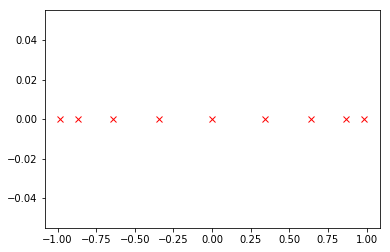

In [6]:
plt.plot(pnts, [0]*len(pnts), 'xr');